In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Reading Data

In [4]:
df = pd.read_csv('NSL_new.csv')


In [5]:
X = df.drop(['label'], axis=1)
y = df['label']

In [6]:
X.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
102045,2696,146,105,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8608,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
98206,0,288,775,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
19961,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
y.head()

102045     normal
49100     neptune
8608        satan
98206      normal
19961      normal
Name: label, dtype: object

In [8]:
y = y.replace( to_replace =  'normal' , value = 0 )

y = y.replace( to_replace =  'neptune' , value = 1 )
y = y.replace( to_replace =  'back' , value = 1 )
y = y.replace( to_replace =  'land' , value = 1 )
y = y.replace( to_replace =  'pod' , value = 1 )
y = y.replace( to_replace =  'smurf' , value = 1 )
y = y.replace( to_replace =  'teardrop' , value = 1 )
y = y.replace( to_replace =  'mailbomb' , value = 1 )
y = y.replace( to_replace =  'apache2' , value = 1 )
y = y.replace( to_replace =  'processtable' , value = 1 )
y = y.replace( to_replace =  'udpstorm' , value = 1 )
y = y.replace( to_replace =  'worm' , value = 1 )

y = y.replace( to_replace =  'ipsweep' , value = 2 )
y = y.replace( to_replace =  'nmap' , value = 2 )
y = y.replace( to_replace =  'portsweep' , value = 2 )
y = y.replace( to_replace =  'satan' , value = 2 )
y = y.replace( to_replace =  'mscan' , value = 2 )
y = y.replace( to_replace =  'saint' , value = 2 )

y = y.replace( to_replace =  'ftp_write' , value = 3 )
y = y.replace( to_replace =  'guess_passwd' , value = 3 )
y = y.replace( to_replace =  'imap' , value = 3)
y = y.replace( to_replace =  'multihop' , value = 3 )
y = y.replace( to_replace =  'phf' , value = 3 )
y = y.replace( to_replace =  'spy' , value = 3 )
y = y.replace( to_replace =  'warezclient' , value = 3 )
y = y.replace( to_replace =  'warezmaster' , value = 3 )
y = y.replace( to_replace =  'sendmail' , value = 3 )
y = y.replace( to_replace =  'snmpgetattack' , value = 3 )
y = y.replace( to_replace =  'snmpguess' , value = 3 )
y = y.replace( to_replace =  'xlock' , value = 3 )
y = y.replace( to_replace =  'xsnoop' , value = 3 )
y = y.replace( to_replace =  'httptunnel' , value = 3 )

y = y.replace( to_replace =  'buffer_overflow' , value = 4 )
y = y.replace( to_replace =  'loadmodule' , value = 4 )
y = y.replace( to_replace =  'perl' , value = 4 )
y = y.replace( to_replace =  'rootkit' , value = 4 )
y = y.replace( to_replace =  'ps' , value = 4 )
y = y.replace( to_replace =  'sqlattack' , value = 4  )
y = y.replace( to_replace =  'xterm' , value = 4 )

y = y.replace( to_replace =  'unknown' , value = 5 )

In [9]:
y.head()

102045    0
49100     1
8608      2
98206     0
19961     0
Name: label, dtype: int64

# Features Importance

In [26]:
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier()
model = DecisionTreeClassifier()
model.fit(X, y)

importances = model.feature_importances_

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



Feature ranking:
1. feature 1 (0.546436)
2. feature 19 (0.160672)
3. feature 31 (0.079156)
4. feature 32 (0.060839)
5. feature 56 (0.053937)
6. feature 9 (0.027599)
7. feature 90 (0.017124)
8. feature 26 (0.014821)
9. feature 65 (0.012832)
10. feature 37 (0.007698)
11. feature 28 (0.005213)
12. feature 29 (0.005174)
13. feature 34 (0.003373)
14. feature 2 (0.002317)
15. feature 33 (0.001666)
16. feature 6 (0.001144)
17. feature 51 (0.000000)
18. feature 50 (0.000000)
19. feature 57 (0.000000)
20. feature 36 (0.000000)
21. feature 55 (0.000000)
22. feature 54 (0.000000)
23. feature 38 (0.000000)
24. feature 53 (0.000000)
25. feature 39 (0.000000)
26. feature 40 (0.000000)
27. feature 41 (0.000000)
28. feature 42 (0.000000)
29. feature 43 (0.000000)
30. feature 44 (0.000000)
31. feature 52 (0.000000)
32. feature 45 (0.000000)
33. feature 35 (0.000000)
34. feature 47 (0.000000)
35. feature 48 (0.000000)
36. feature 49 (0.000000)
37. feature 46 (0.000000)
38. feature 121 (0.000000)
39. fea

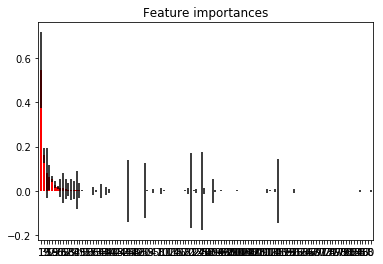

In [28]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()